# Домашнее задание 3.3
## Работа с данными
### выполнила Щеглова Полина, СКБ172

В данном задании проведем анализ реальных данных. Воспользуемся основной интерпретацией гипергеометрического распределения - выборки из генеральной совокупности. Проще говоря, в терминах используемых далее данных, имея исходы 600 партий для игрока, мы берем выборки размера 100 партий и смотрим какова вероятность, что игрок проиграл/выиграл в ровно $x$ из них.
Типичная интерпретация - основа любой нетипичной интерпретации, поэтому для дальнейшей успешной работы с чем-то более сложным, стоит сначала разобраться с более простым.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r = (open('win-loss.csv', 'r', encoding='utf-8').read()).split('\n')
df = pd.Series( list(map(int,r)) ) # 0-победа, 1-проигрыш
df
print(600 - np.sum(df))# узнаем суммарное количество выигрышей

303


In [65]:
from functools import reduce
win_sum = [] #будем брать выборки размера 100 и считать суммарное количество выигрышей в каждой выборке.
# так как возможных сочетаний Binomial[600,100], можно взять 900 вариантов сочетаний и посчитать для каждого сумму выигрышей
for i in np.arange(100):
    
    win_sum.append(100 - np.sum(df[i:i+100]))
    win_sum.append(100 - np.sum(df[50+i:i+150]))
    win_sum.append(100 - np.sum(df[200+i:i+300]))
    win_sum.append(100 - np.sum(df[250+i:i+350]))
    win_sum.append(100 - np.sum(df[400+i:i+500]))
    win_sum.append(100 - np.sum(df[100+i:i+200]))
    win_sum.append(100 - np.sum(df[150+i:i+250]))
    win_sum.append(100 - np.sum(df[300+i:i+400]))
    win_sum.append(100 - np.sum(df[350+i:i+450]))
    
            
def sample_mean(array_):
    sample_=len(array_)
    return reduce(lambda a,b : a+b, array_)/sample_
def sample_variance(array_):
    sample_=len(array_)
    sample_mean_ = sample_mean(array_)
    return reduce(lambda a,b : a+b, list(map(lambda j: (j-sample_mean_)**2, array_)))/(sample_-1)

print(sample_mean(win_sum), sample_variance(win_sum))

49.94 44.95078976640701


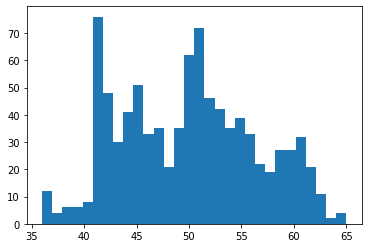

In [64]:
plt.hist(win_sum, bins=30)
plt.show()